In [ ]:
#import kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Create a datasets folder
!mkdir -p datasets

# Download the Kaggle dataset
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri -p datasets

# Unzip the dataset if it's a ZIP file
!unzip datasets/*.zip -d datasets

# Verify the dataset directory
!ls datasets

Saving kaggle (4).json to kaggle (4).json
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 97% 84.0M/86.8M [00:00<00:00, 92.0MB/s]
100% 86.8M/86.8M [00:00<00:00, 91.1MB/s]
Archive:  datasets/brain-tumor-classification-mri.zip
  inflating: datasets/Testing/glioma_tumor/image(1).jpg  
  inflating: datasets/Testing/glioma_tumor/image(10).jpg  
  inflating: datasets/Testing/glioma_tumor/image(100).jpg  
  inflating: datasets/Testing/glioma_tumor/image(11).jpg  
  inflating: datasets/Testing/glioma_tumor/image(12).jpg  
  inflating: datasets/Testing/glioma_tumor/image(13).jpg  
  inflating: datasets/Testing/glioma_tumor/image(14).jpg  
  inflating: datasets/Testing/glioma_tumor/image(15).jpg  
  inflating: datasets/Testing/glioma_tumor/image(16).jpg  
  inflating: datasets/Testing/glioma_tumor/image(17)

In [ ]:
!pwd  # Print the current working directory
!ls   # List files and folders in the current directory


/content
datasets  sample_data


**Loading the Testing Dataset**

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the path to the dataset
dataset_path = "/content/datasets/Testing"  # Adjust the folder path if needed
categories = os.listdir(dataset_path)

data = []
labels = []

# Iterate through each category folder
for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = categories.index(category)  # Assign labels (0, 1, etc.)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {img_name}")
            continue

        try:
            # Load and preprocess the image
            img = load_img(img_path, target_size=(128, 128))  # Resize as needed
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

# Convert data and labels to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

print("Dataset loaded successfully!")
print(f"Total images: {len(data)}, Total labels: {len(labels)}")


Dataset loaded successfully!
Total images: 394, Total labels: 394


**Loading the Training Dataset**

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the path to the dataset
dataset_path = "/content/datasets/Training"  # Adjust the folder path if needed
categories = os.listdir(dataset_path)

data = []
labels = []

# Iterate through each category folder
for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = categories.index(category)  # Assign labels (0, 1, etc.)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {img_name}")
            continue

        try:
            # Load and preprocess the image
            img = load_img(img_path, target_size=(128, 128))  # Resize as needed
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

# Convert data and labels to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

print("Dataset loaded successfully!")
print(f"Total images: {len(data)}, Total labels: {len(labels)}")


Dataset loaded successfully!
Total images: 2870, Total labels: 2870


In [ ]:
# Define the paths for training and testing sets
train_path = "/content/datasets/Training"
test_path = "/content/datasets/Testing"

# Process the training set
categories_train = os.listdir(train_path)
train_data = []
train_labels = []

for category in categories_train:
    category_path = os.path.join(train_path, category)
    label = categories_train.index(category)  # Assign a label
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = load_img(img_path, target_size=(128, 128))  # Resize images
                img_array = img_to_array(img)
                train_data.append(img_array)
                train_labels.append(label)
            except Exception as e:
                print(f"Error loading {img_name}: {e}")

# Process the testing set
categories_test = os.listdir(test_path)
test_data = []
test_labels = []

for category in categories_test:
    category_path = os.path.join(test_path, category)
    label = categories_test.index(category)  # Assign a label
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img = load_img(img_path, target_size=(128, 128))  # Resize images
                img_array = img_to_array(img)
                test_data.append(img_array)
                test_labels.append(label)
            except Exception as e:
                print(f"Error loading {img_name}: {e}")

# Convert to NumPy arrays
train_data = np.array(train_data) / 255.0  # Normalize pixel values
train_labels = np.array(train_labels)
test_data = np.array(test_data) / 255.0    # Normalize pixel values
test_labels = np.array(test_labels)

print("Training and testing datasets prepared successfully!")
print(f"Training data: {len(train_data)}, Testing data: {len(test_data)}")



Training and testing datasets prepared successfully!
Training data: 2870, Testing data: 394


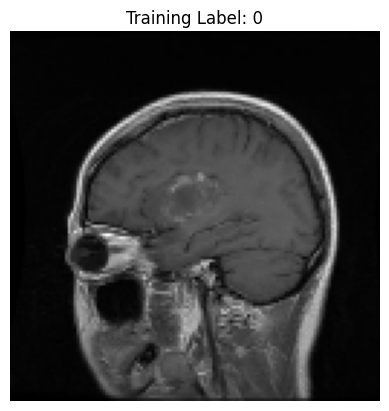

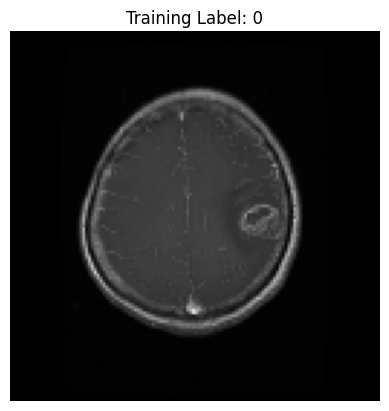

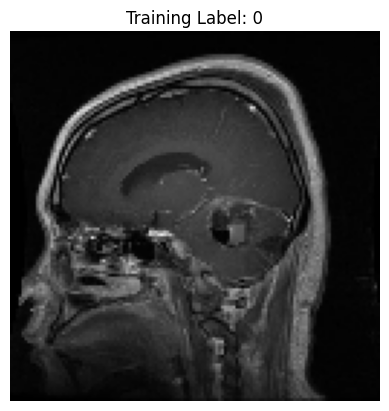

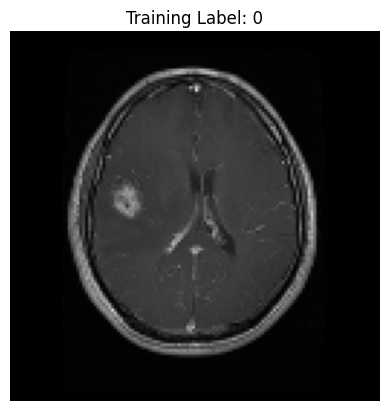

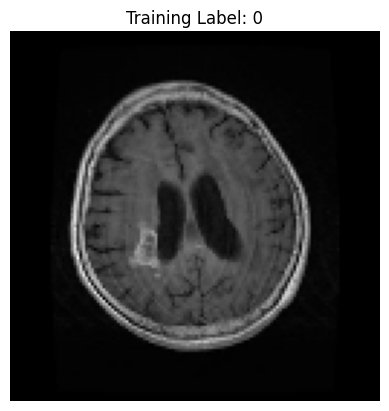

In [ ]:
# Display the first 5 images from the training set
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(train_data[i])
    plt.title(f"Training Label: {train_labels[i]}")
    plt.axis('off')  # Remove axes for better display
    plt.show()



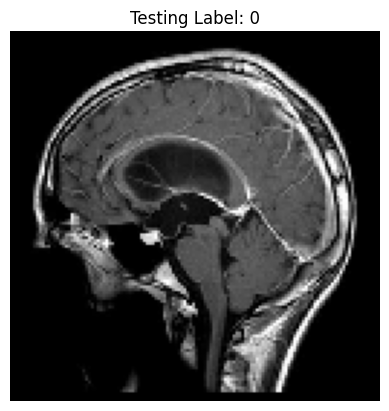

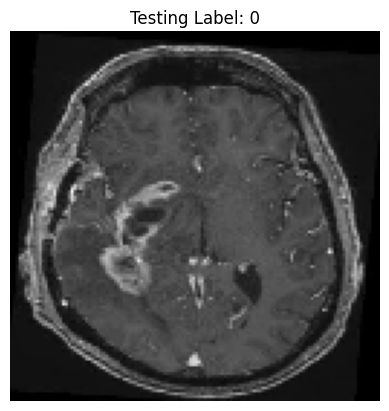

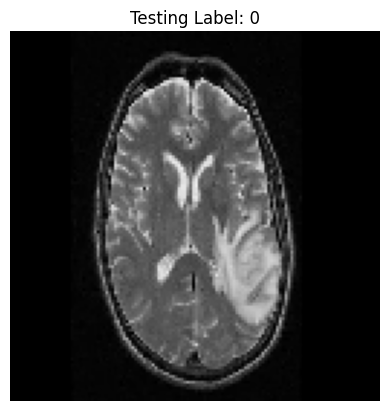

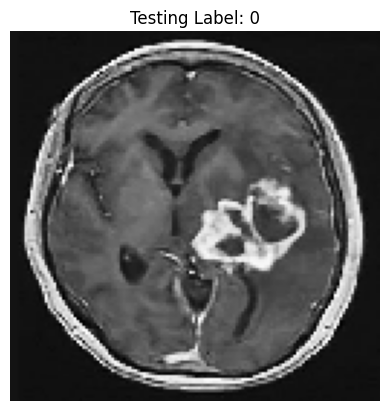

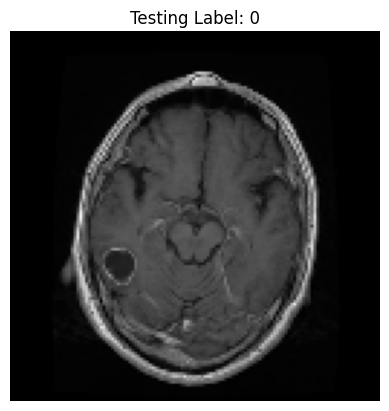

In [ ]:
# Display the first 5 images from the testing set
for i in range(5):
    plt.imshow(test_data[i])
    plt.title(f"Testing Label: {test_labels[i]}")
    plt.axis('off')
    plt.show()

**Spliting the dataset in training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (70%), validation (20%), and testing (10%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Testing samples: {len(X_test)}")


Training samples: 2009, Validation samples: 576, Testing samples: 285


**One Hot Encoding for multiclass classification**

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(f"Label shape after encoding: {y_train.shape}")


Label shape after encoding: (2009, 4)


**Build the CNN model of our Dataset**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Changed to 4 categories based on the error message
])

model.summary()  # Print model architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Train the model**

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4983 - loss: 1.1894 - val_accuracy: 0.6493 - val_loss: 0.8220
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6849 - loss: 0.7684 - val_accuracy: 0.7812 - val_loss: 0.5579
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7930 - loss: 0.5381 - val_accuracy: 0.7691 - val_loss: 0.5878
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8484 - loss: 0.4615 - val_accuracy: 0.8472 - val_loss: 0.3966
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8621 - loss: 0.3587 - val_accuracy: 0.8368 - val_loss: 0.3722
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9125 - loss: 0.2461 - val_accuracy: 0.8837 - val_loss: 0.3119
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9277 - loss: 0.2018 - val_accuracy: 0.7795 - val_loss: 0.4846
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9234 - loss: 0.1932 - val_accuracy: 0.8837 - val_loss:

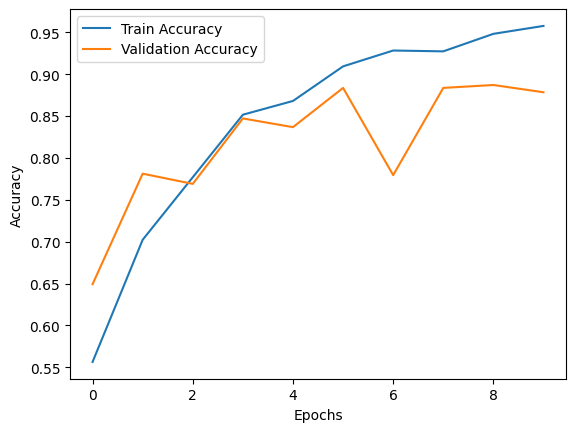

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,  # Start with 10 epochs; adjust as needed
                    batch_size=32)

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Evaluate the Model**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.8773 - loss: 0.3239
Test Accuracy: 88.42%


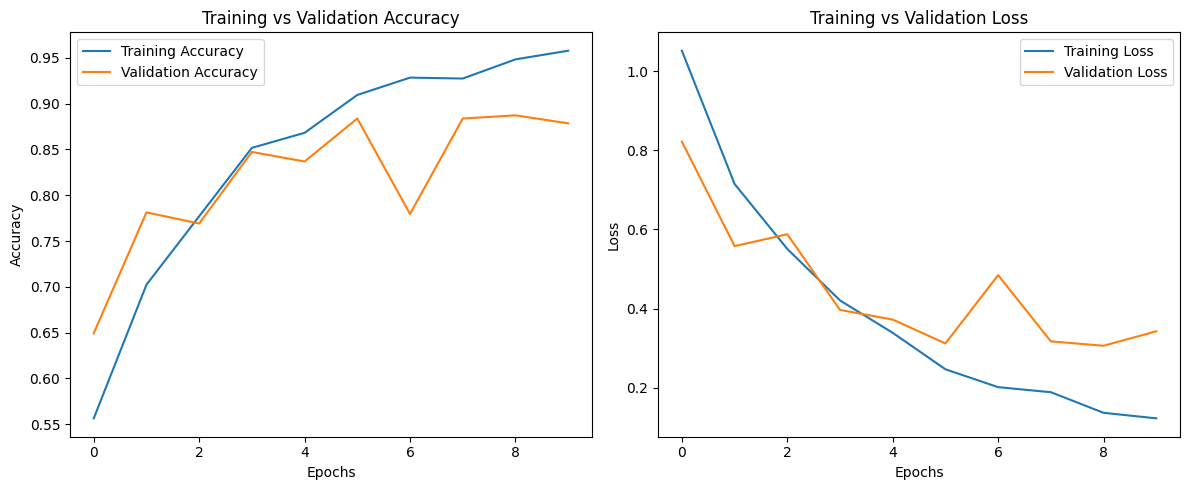

In [ ]:
# Visualize training accuracy and loss
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Save the Model**

In [ ]:
model.save("brain_tumor_detection_model.h5")
print("Model saved as brain_tumor_detection_model.h5")


Model saved as brain_tumor_detection_model.h5


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


**Make Predictions**

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step


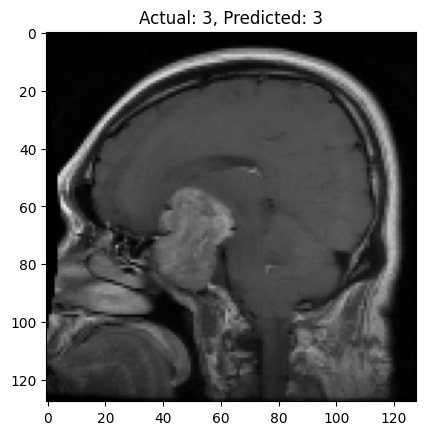

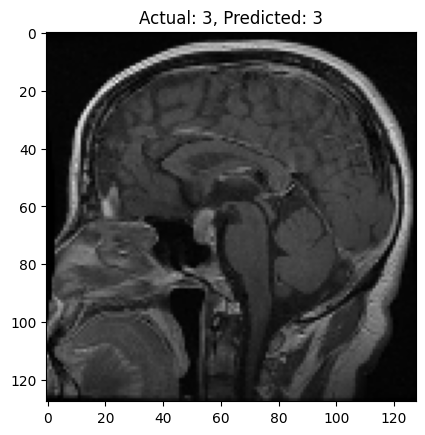

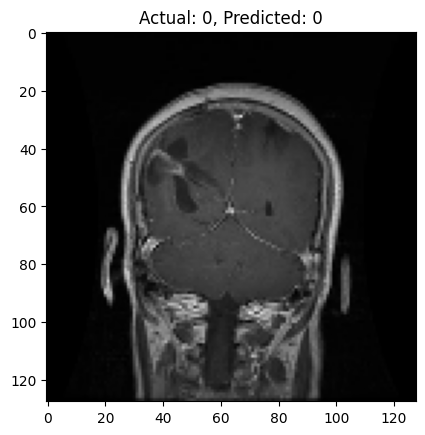

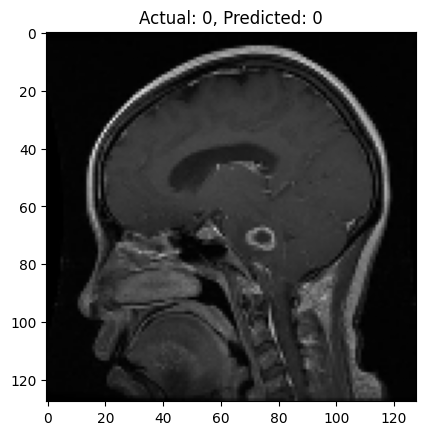

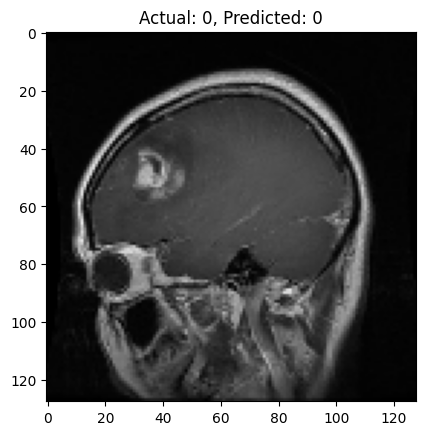

In [ ]:
import numpy as np

# Predict on test images
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Display a few predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step
Test Accuracy: 30.18%


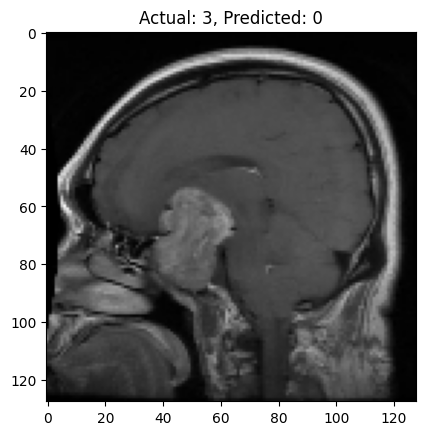

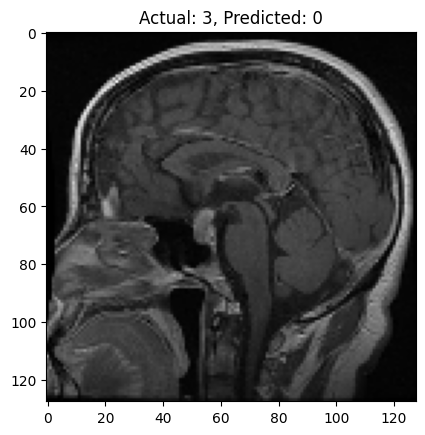

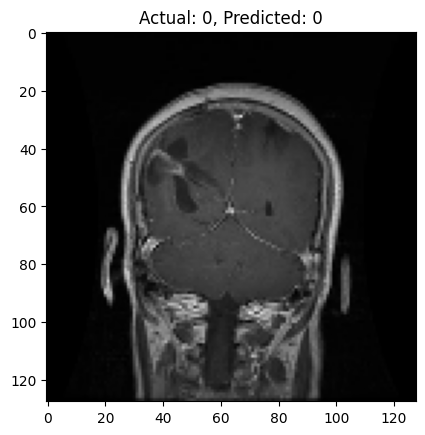

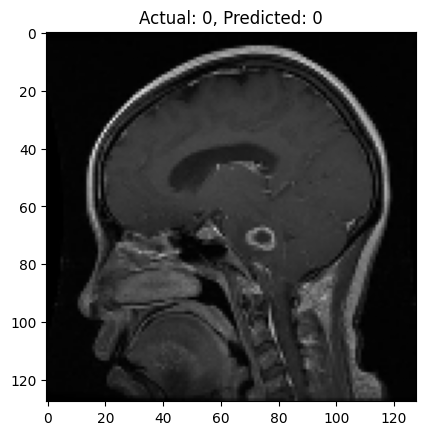

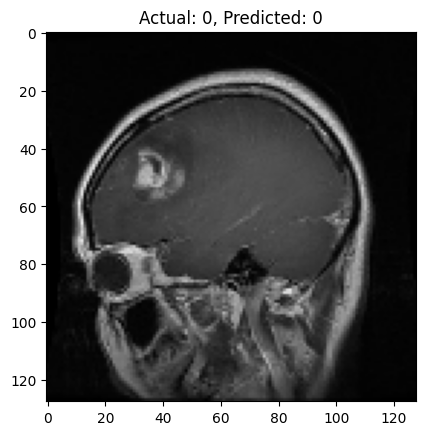

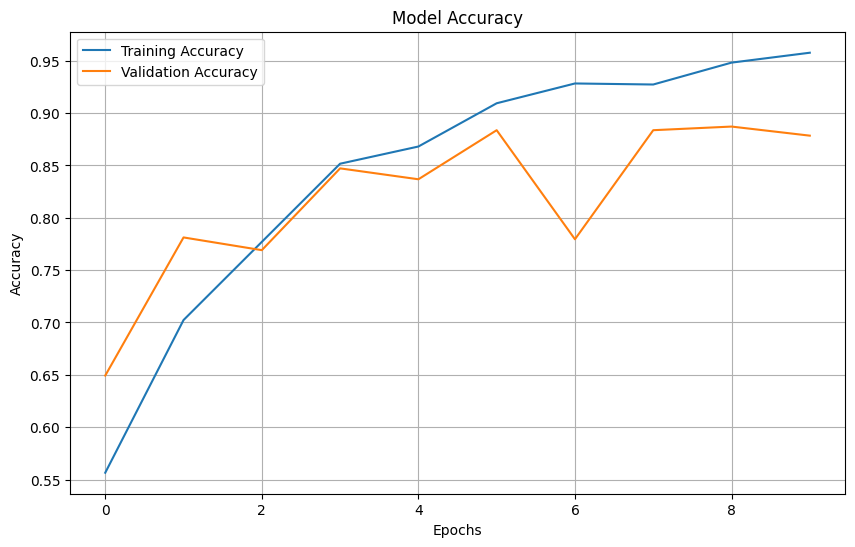

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on test images
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Calculate accuracy on the test set
test_accuracy = np.sum(predicted_classes == actual_classes) / len(actual_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display a few predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.show()

# Assuming history object is available (from model.fit())
# Example: history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot training and validation accuracy
if 'history' in locals():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Training history not found. Make sure to assign the history object when training the model.")


**Checking the shapes (rows and columns)**

In [ ]:
print(test_labels.shape)  # Check the shape of actual labels
print(predictions.shape)  # Check the shape of predicted labels


(394,)
(285, 4)


**Finding the confusion Matrix**

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 626ms/step


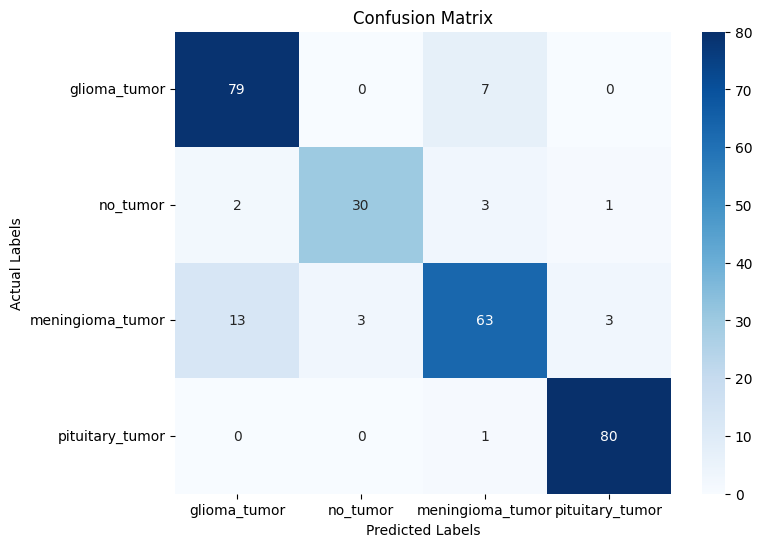

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure predicted_labels and actual_labels have the same length
# predictions should be made on the same dataset (X_test, y_test) without any discrepancies
predictions = model.predict(X_test)  # Shape (394, 4), assuming 394 test samples and 4 classes

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)  # Shape (394,)

# Convert one-hot encoded actual labels to class labels
actual_labels = np.argmax(y_test, axis=1)  # Shape (394,)

# Validate that both arrays have the same length
if len(predicted_labels) != len(actual_labels):
    print(f"Length mismatch: Predicted ({len(predicted_labels)}), Actual ({len(actual_labels)})")
else:
    # Compute confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)

    # Plot confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()



**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(actual_labels, predicted_labels, target_names=categories))


                  precision    recall  f1-score   support

    glioma_tumor       0.84      0.92      0.88        86
        no_tumor       0.91      0.83      0.87        36
meningioma_tumor       0.85      0.77      0.81        82
 pituitary_tumor       0.95      0.99      0.97        81

        accuracy                           0.88       285
       macro avg       0.89      0.88      0.88       285
    weighted avg       0.88      0.88      0.88       285



**Visualize the Prediction Results**

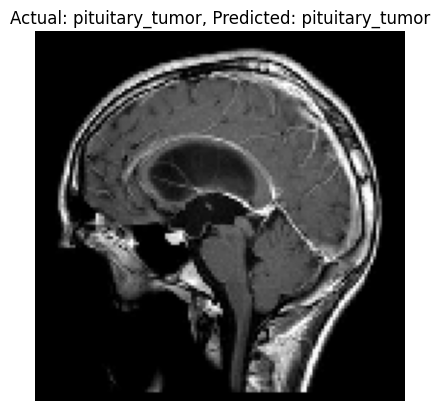

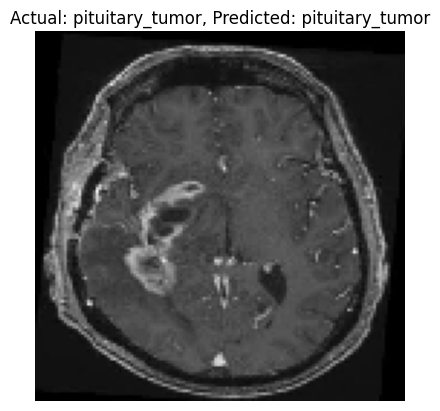

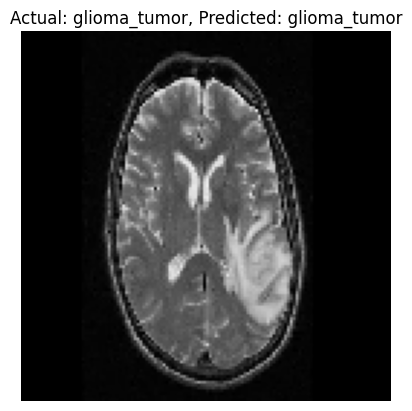

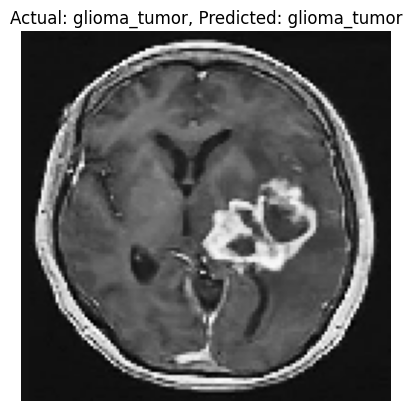

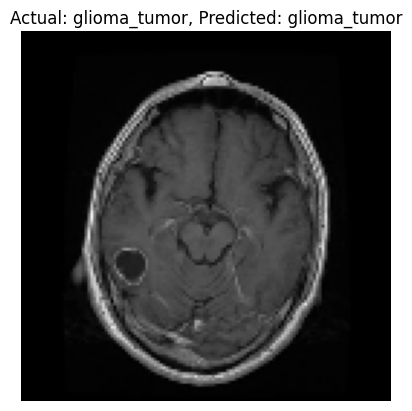

In [ ]:
# Show a few test predictions
for i in range(5):
    plt.imshow(test_data[i])
    plt.title(f"Actual: {categories[actual_labels[i]]}, Predicted: {categories[predicted_labels[i]]}")
    plt.axis('off')
    plt.show()


**Data Augmentation**

**Import Necessary Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array


**Set Up the ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_data)  # Fit the generator on training data


**Transfer Learning**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load a pre-trained model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add your custom layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile and train the model as usual
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Save the Model**

In [ ]:
# Save model
model.save("brain_tumor_detection_model.h5")
print("Model saved!")

# Load model later
from tensorflow.keras.models import load_model
model = load_model("brain_tumor_detection_model.h5")


Model saved!


**Predict using the new image**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the new image
img_path = "/content/CNN predictions 6.jpeg"
img = load_img(img_path, target_size=(128, 128))  # Resize to the input size expected by the model
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Predict the class
prediction = model.predict(np.expand_dims(img_array, axis=0))
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {categories[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
Predicted class: glioma_tumor


**Predict the image by getting the actual and predicted class**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted class: glioma_tumor
Actual class: no_tumor


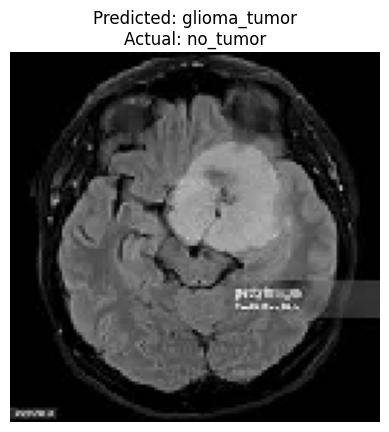

In [ ]:
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']  # Replace with your actual class names

# Path to the new image
img_path = "/content/CNN predictions 6.jpeg"

# Load and preprocess the new image
img = load_img(img_path, target_size=(128, 128))  # Resize to the input size expected by the model
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Predict the class
prediction = model.predict(np.expand_dims(img_array, axis=0))
predicted_class = np.argmax(prediction, axis=1)

# You should already have the actual class (label) for the image, for example:
# Replace this with the actual class (you can hardcode it if known, or if you have a label dataset)
actual_class = 2  # Replace this with the actual class index of the image

# Display predicted and actual class
print(f"Predicted class: {categories[predicted_class[0]]}")
print(f"Actual class: {categories[actual_class]}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted: {categories[predicted_class[0]]}\nActual: {categories[actual_class]}")
plt.axis('off')  # Hide the axes for better visualization
plt.show()

In [ ]:
!git config --global user.email "tahermadraswala2004@gmail.com"
!git config --global user.name "tahermadraswala786"

!git clone https://github.com/tahermadraswala786/Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN.git

Cloning into 'Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [ ]:
!mv Brain_Tumor_Detection_Using_CNN Final project.ipynb Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN/
%cd Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN
!git config --global user.email "tahermadraswala2004@gmail.com"
!git config --global user.name "tahermadraswala786"
!git add .
!git commit -m "Initial commit of Colab project"
!git push origin main

mv: target 'Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN/' is not a directory
[Errno 2] No such file or directory: 'Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN'
/content/Experimental-Analysis-of-Brain-Tumor-Detection-Using-CNN
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
